<a href="https://colab.research.google.com/github/Namain231/1st_words/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/housing.csv")
df = pd.DataFrame(data)

print("Dimensions of Housing Dataframe:", (df.shape), "\n")
print("Rows:", df.shape[0])
display( df.head())
print("\n")
display(df.describe())

Dimensions of Housing Dataframe: (20640, 10) 

Rows: 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,index,min,max,mean,median,std
0,longitude,-124.3500,-114.3100,-119.569704,-118.4900,2.003532
1,latitude,32.5400,41.9500,35.631861,34.2600,2.135952
2,housing_median_age,1.0000,52.0000,28.639486,29.0000,12.585558
3,total_rooms,2.0000,39320.0000,2635.763081,2127.0000,2181.615252
4,total_bedrooms,1.0000,6445.0000,537.870553,435.0000,421.385070
5,population,3.0000,35682.0000,1425.476744,1166.0000,1132.462122
6,households,1.0000,6082.0000,499.539680,409.0000,382.329753
7,median_income,0.4999,15.0001,3.870671,3.5348,1.899822
8,median_house_value,14999.0000,500001.0000,206855.816909,179700.0000,115395.615874


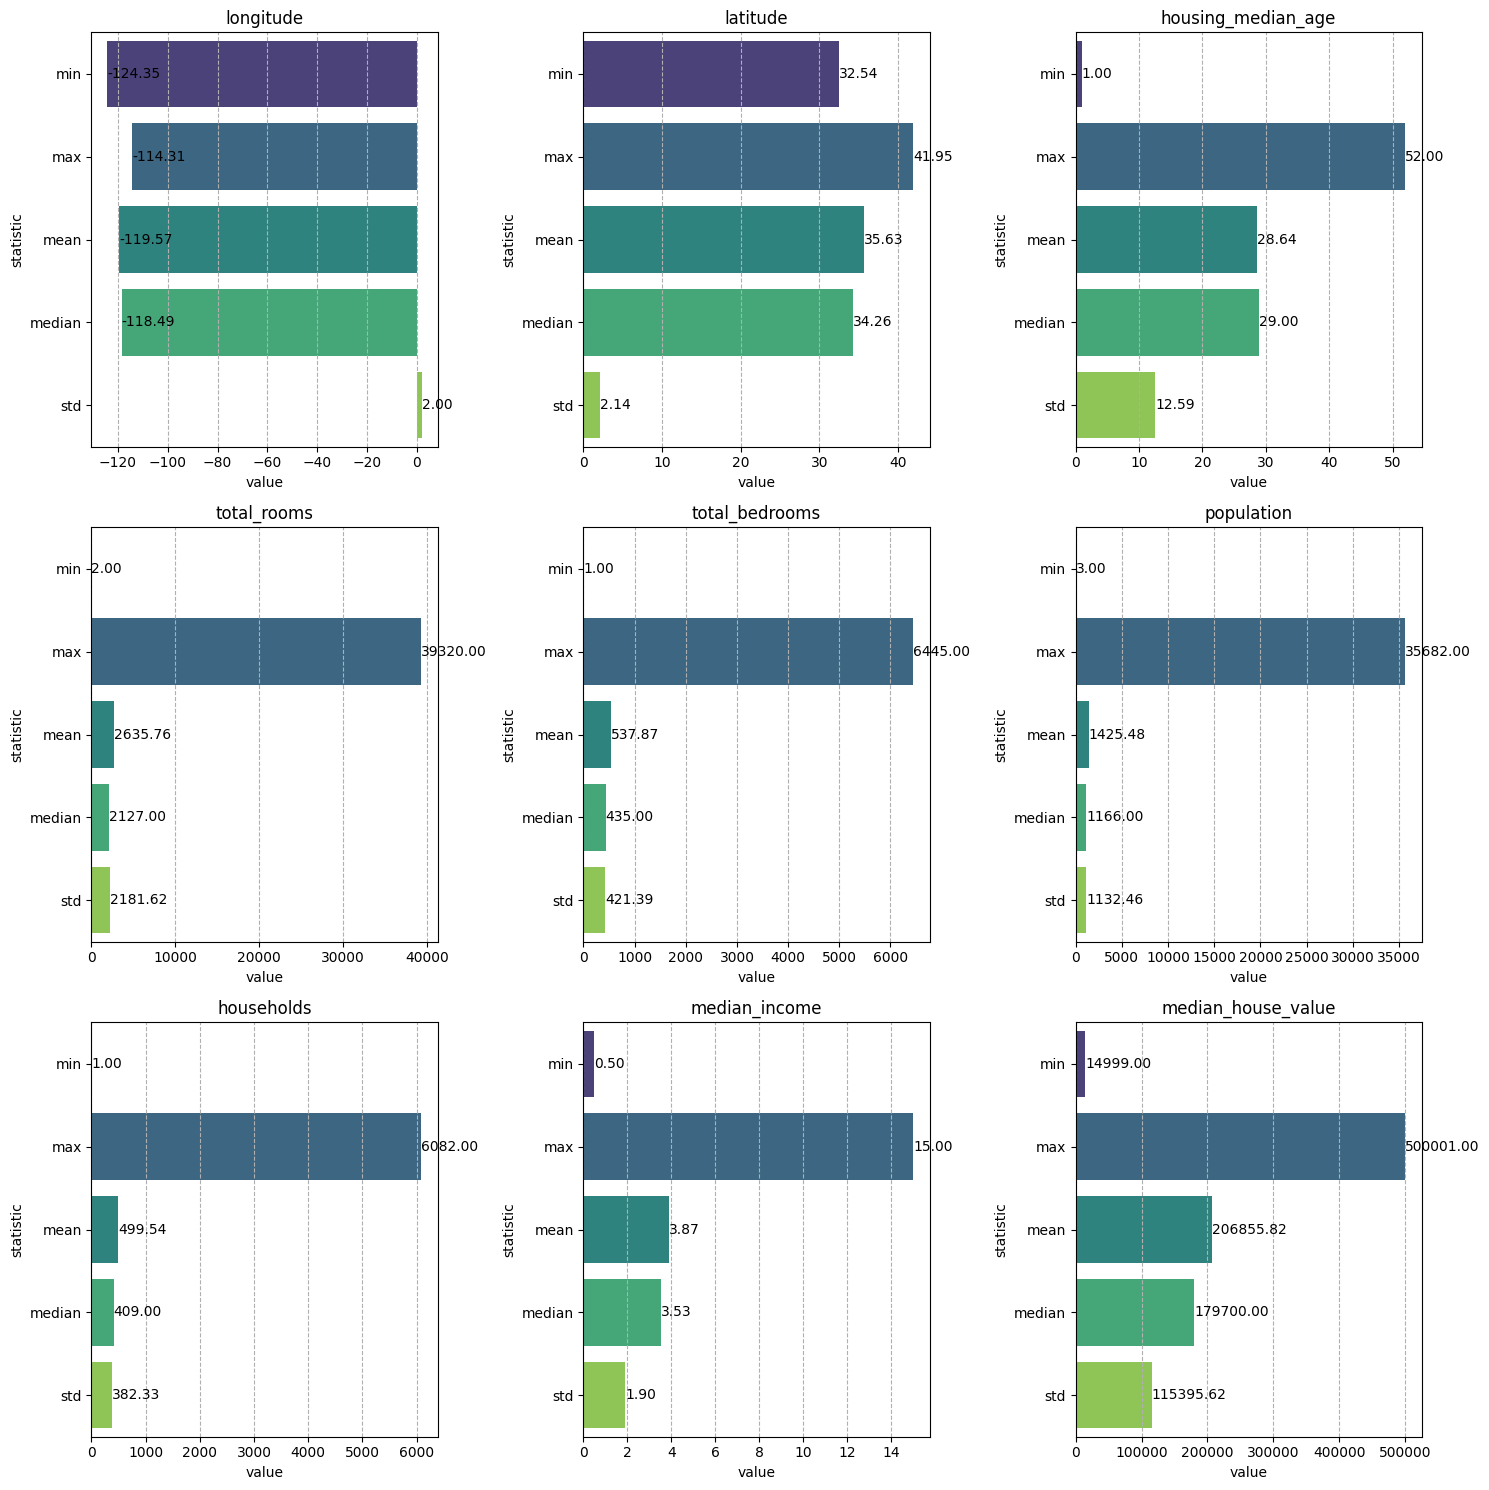

In [ ]:
def Visualizer(df):
  df_numerical = df.select_dtypes(include=np.number)
  df_stats = df_numerical.describe().transpose()
  df_viz = df_stats[['min', 'max', 'mean', '50%', 'std']].reset_index()
  df_viz = df_viz.rename(columns={'50%': 'median'})
  display(df_viz)

  df_melted = df_viz.melt(id_vars='index', value_vars=['min', 'max', 'mean', 'median', 'std'], var_name='statistic', value_name='value')
  num_features = len(df_melted['index'].unique())
  n_cols = 3
  n_rows = (num_features + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
  axes = axes.flatten()

  for i, feature in enumerate(df_melted['index'].unique()):
      ax = axes[i]
      feature_data = df_melted[df_melted['index'] == feature]
      sns.barplot(x='value', y='statistic', data=feature_data, ax=ax, palette='viridis', hue = 'statistic')
      ax.set_title(feature)
      ax.grid(axis='x', linestyle='--')
      for j, v in enumerate(feature_data['value']):
          ax.text(v, j, f'{v:.2f}', color='black', va='center')

  for i in range(num_features, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()

Visualizer(df)

Number of duplicates:  0
Number of missing values:  0
Columns with missing values:  []


,index,min,max,mean,median,std
0,longitude,-124.350000,-114.310000,-119.569704,-118.490000,2.003532
1,latitude,32.540000,41.950000,35.631861,34.260000,2.135952
2,housing_median_age,1.000000,52.000000,28.639486,29.000000,12.585558
3,total_rooms,2.000000,39320.000000,2635.763081,2127.000000,2181.615252
4,total_bedrooms,1.000000,6445.000000,537.870553,438.000000,419.266592
5,population,3.000000,35682.000000,1425.476744,1166.000000,1132.462122
6,households,1.000000,6082.000000,499.539680,409.000000,382.329753
7,median_income,0.499900,15.000100,3.870671,3.534800,1.899822
8,median_house_value,14999.000000,500001.000000,206855.816909,179700.000000,115395.615874
9,ocean_proximity,0.000000,4.000000,1.165843,1.000000,1.420662


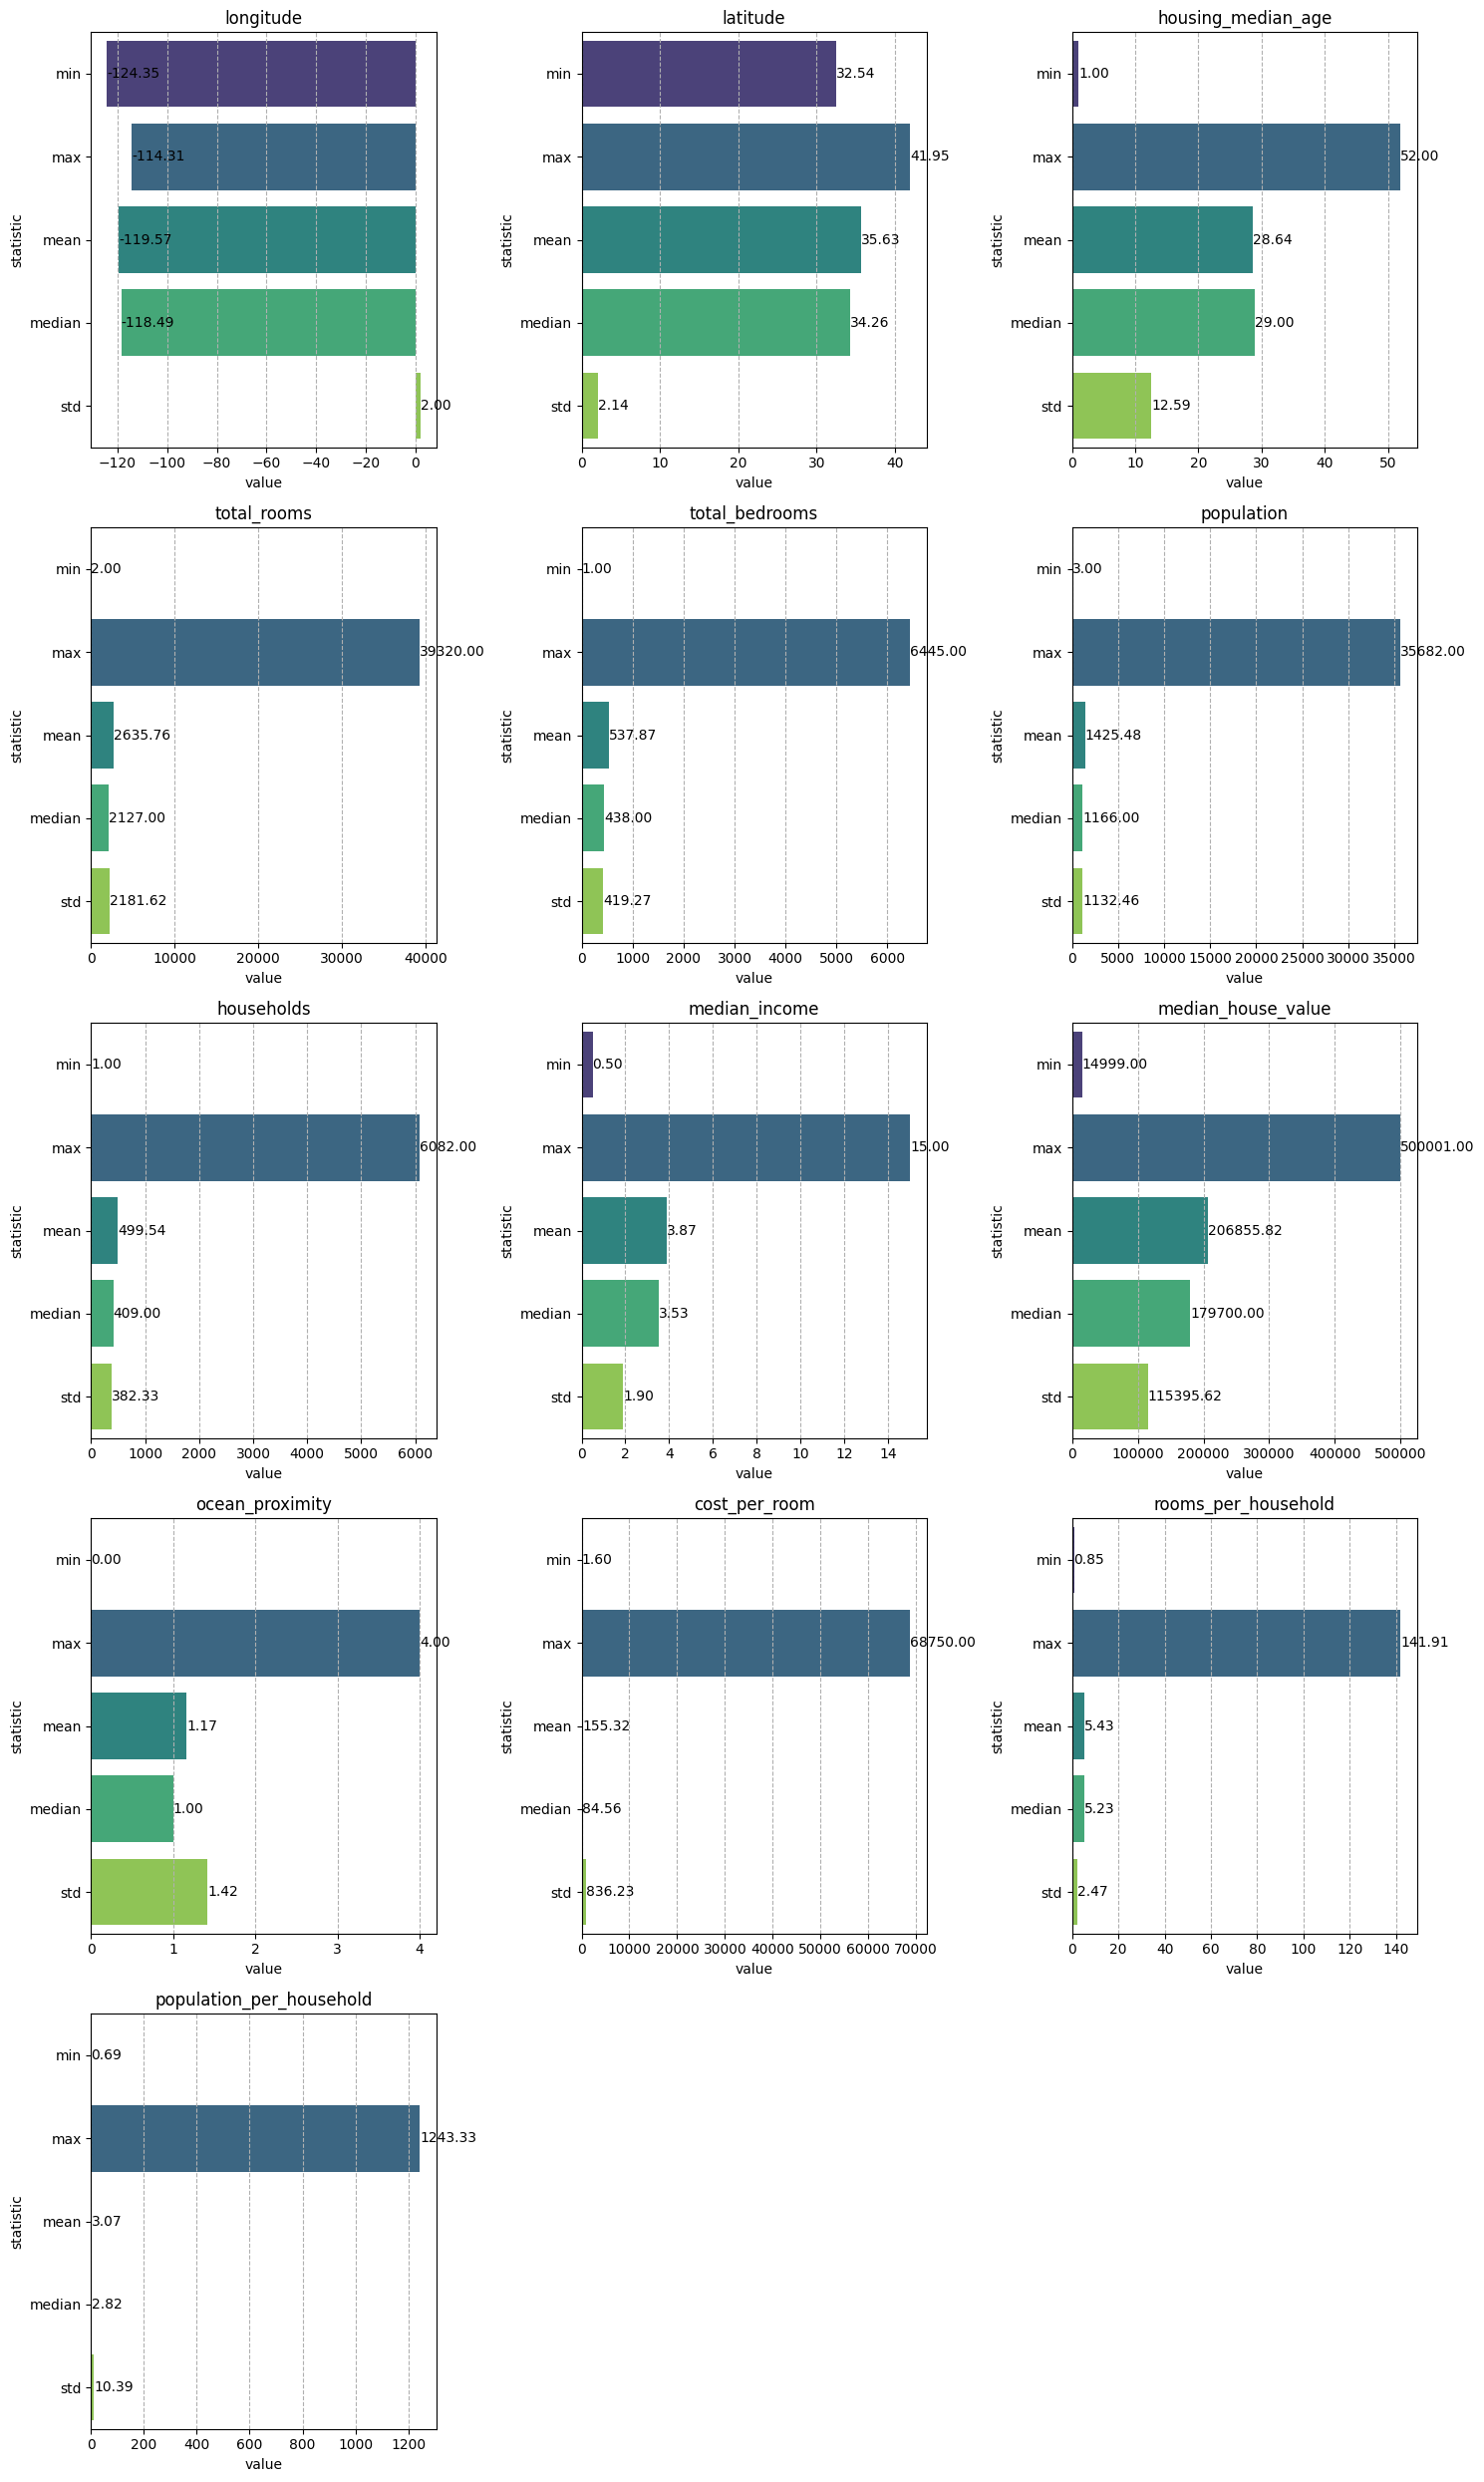


--- Task 6: Visualizing Imputation Impact ---


TypeError: argument of type 'builtin_function_or_method' is not iterable

In [61]:
print("Number of duplicates: " , df.duplicated().sum())
print("Number of missing values: " , df.isna().sum().sum())

numerical_cols = df.select_dtypes(include=np.number).columns
missing_values_per_column = df[numerical_cols].isna().sum()
numerical_cols_with_missing_values = missing_values_per_column[missing_values_per_column > 0].index.tolist()
print("Columns with missing values: ", numerical_cols_with_missing_values)
for col in numerical_cols_with_missing_values:
    if df[col].std() > df[col].mean():
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())

df['ocean_proximity'] = df['ocean_proximity'].fillna(df['ocean_proximity'].mode())
df.drop_duplicates(inplace=True)
Visualizer(df)

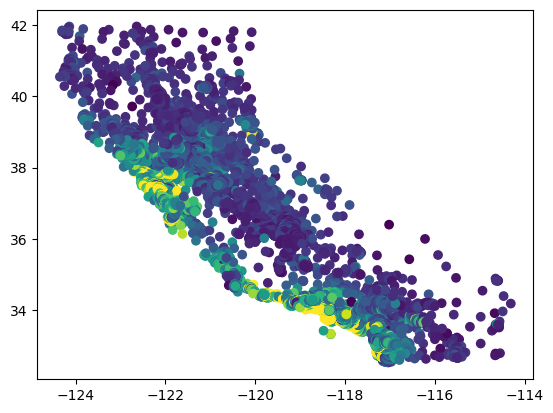

In [58]:
plt.scatter(df['longitude'] , df['latitude'] , c = df['median_house_value'])


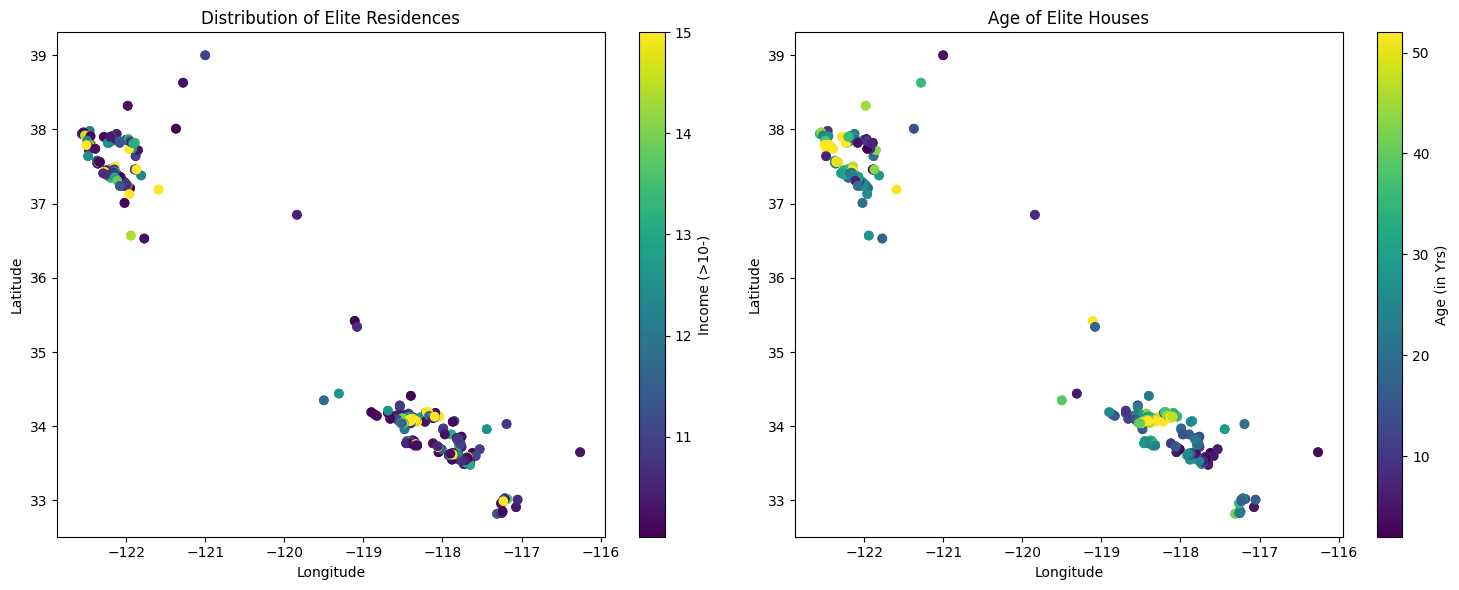

In [ ]:

median_income_val = df['median_income'].median()
df_above_median_income = df[df['median_income'] > 10]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Median Income vs Location for areas with above-median income
axes[0].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['median_income'])
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
fig.colorbar(axes[0].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['median_income']), ax=axes[0], label='Income (>10-)')
axes[0].set_title('Distribution of Elite Residences')

# Second subplot: Age of the Elite residences

#median_house_age = df['housing_median_age'].median()
#df_above_median_age = df[df['housing_median_age'] > 40]
axes[1].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['housing_median_age'])
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
fig.colorbar(axes[1].scatter(df_above_median_income['longitude'], df_above_median_income['latitude'], c=df_above_median_income['housing_median_age']), ax=axes[1], label='Age (in Yrs)')
axes[1].set_title('Age of Elite Houses')

plt.tight_layout()
plt.show()

housing_median_age                            total_rooms  \
                              mean median min max        std         mean   
ocean_proximity                                                             
<1H OCEAN                29.279225   30.0   2  52  11.644453  2628.343586   
INLAND                   24.271867   23.0   1  52  12.018020  2717.742787   
ISLAND                   42.400000   52.0  27  52  13.164346  1574.600000   
NEAR BAY                 37.730131   39.0   2  52  13.070385  2493.589520   
NEAR OCEAN               29.347254   29.0   2  52  11.840371  2583.700903   

                                                  ... median_income           \
                 median  min    max          std  ...          mean   median   
ocean_proximity                                   ...                          
<1H OCEAN        2108.0   11  37937  2160.463696  ...      4.230682  3.87500   
INLAND           2131.0    2  39320  2385.831111  ...      3.208996  2.98770   
ISLAND           1675.0  716   2359   707.545264  ...      2.744420  2.73610   
NEAR BAY         2083.0    8  18634  1830.817022  ...      4.172885  3.81865   
NEAR OCEAN       2195.0   15  30405  1990.724760  ...      4.005785  3.64705   

                                           median_house_value            \
                    min      max       std               mean    median   
ocean_proximity                                                           
<1H OCEAN        0.4999  15.0001  2.001223      240084.285464  214850.0   
INLAND           0.4999  15.0001  1.437465      124805.392001  108500.0   
ISLAND           2.1579   3.3906  0.444180      380440.000000  414700.0   
NEAR BAY         0.4999  15.0001  2.017427      259212.311790  233800.0   
NEAR OCEAN       0.5360  15.0001  2.010558      249433.977427  229450.0   

                                                
                    min     max            std  
ocean_proximity                                 
<1H OCEAN         17500  500001  106124.292213  
INLAND            14999  500001   70007.908494  
ISLAND           287500  450000   80559.561816  
NEAR BAY          22500  500001  122818.537064  
NEAR OCEAN        22500  500001  122477.145927  

[5 rows x 35 columns]

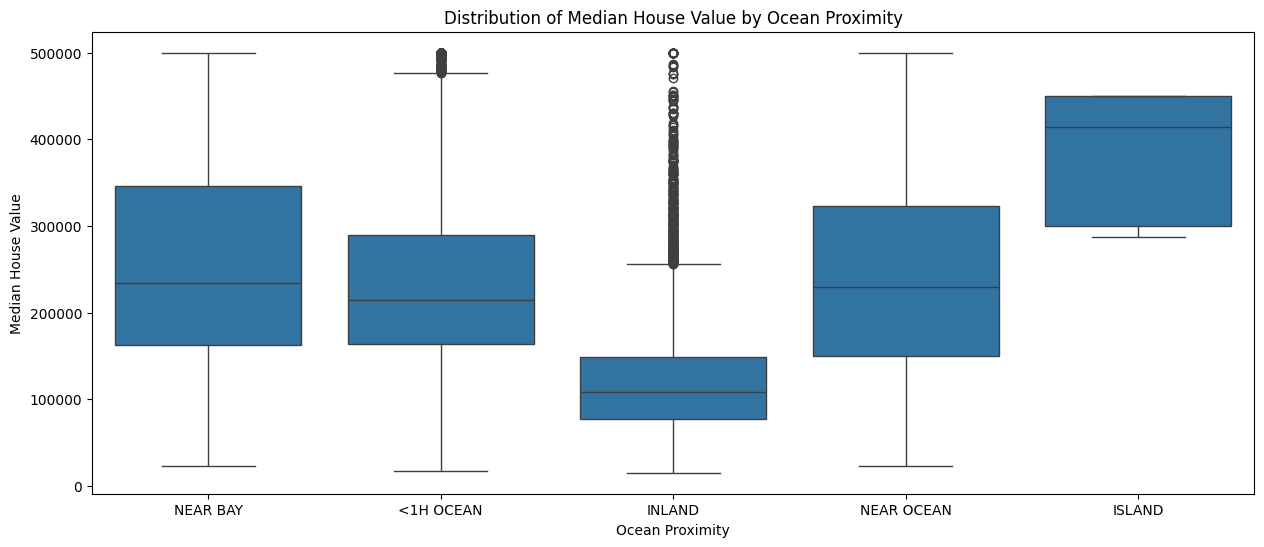

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [ ]:
ocean_proximity_stats = df.groupby('ocean_proximity').agg({
    'housing_median_age': ['mean', 'median', 'min', 'max', 'std'],
    'total_rooms': ['mean', 'median', 'min', 'max', 'std'],
    'total_bedrooms': ['mean', 'median', 'min', 'max', 'std'],
    'population': ['mean', 'median', 'min', 'max', 'std'],
    'households': ['mean', 'median', 'min', 'max', 'std'],
    'median_income': ['mean', 'median', 'min', 'max', 'std'],
    'median_house_value': ['mean', 'median', 'min', 'max', 'std']
})
display(ocean_proximity_stats)
plt.figure(figsize=(15, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.show()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
display(df.head())

# Data Analysis Key Findings

The ocean_proximity categories show distinct differences in median_house_value. The "NEAR OCEAN" and "ISLAND" categories have the highest average median house values ($249,433 and $380,440 respectively), while "INLAND" has the lowest ($124,805).

The box plot visualization confirms the disparity in median_house_value distribution across ocean_proximity categories, with "NEAR OCEAN" and "ISLAND" showing higher median values and wider distributions compared to "INLAND".

The ocean_proximity categorical variable has been successfully encoded into numerical representations using LabelEncoder, preparing it for potential use in numerical models.

The ocean_proximity feature appears to be a significant predictor of median_house_value and should be included in any predictive modeling efforts.


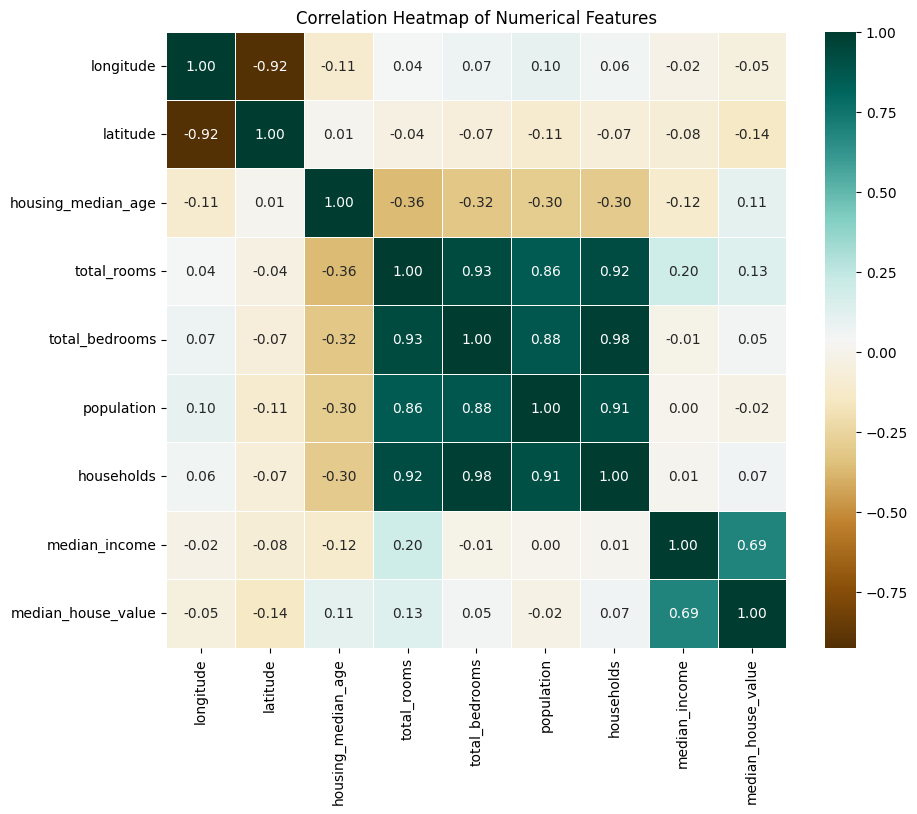

In [ ]:
numerical_cols = data.select_dtypes(include=np.number)

#heatmap
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

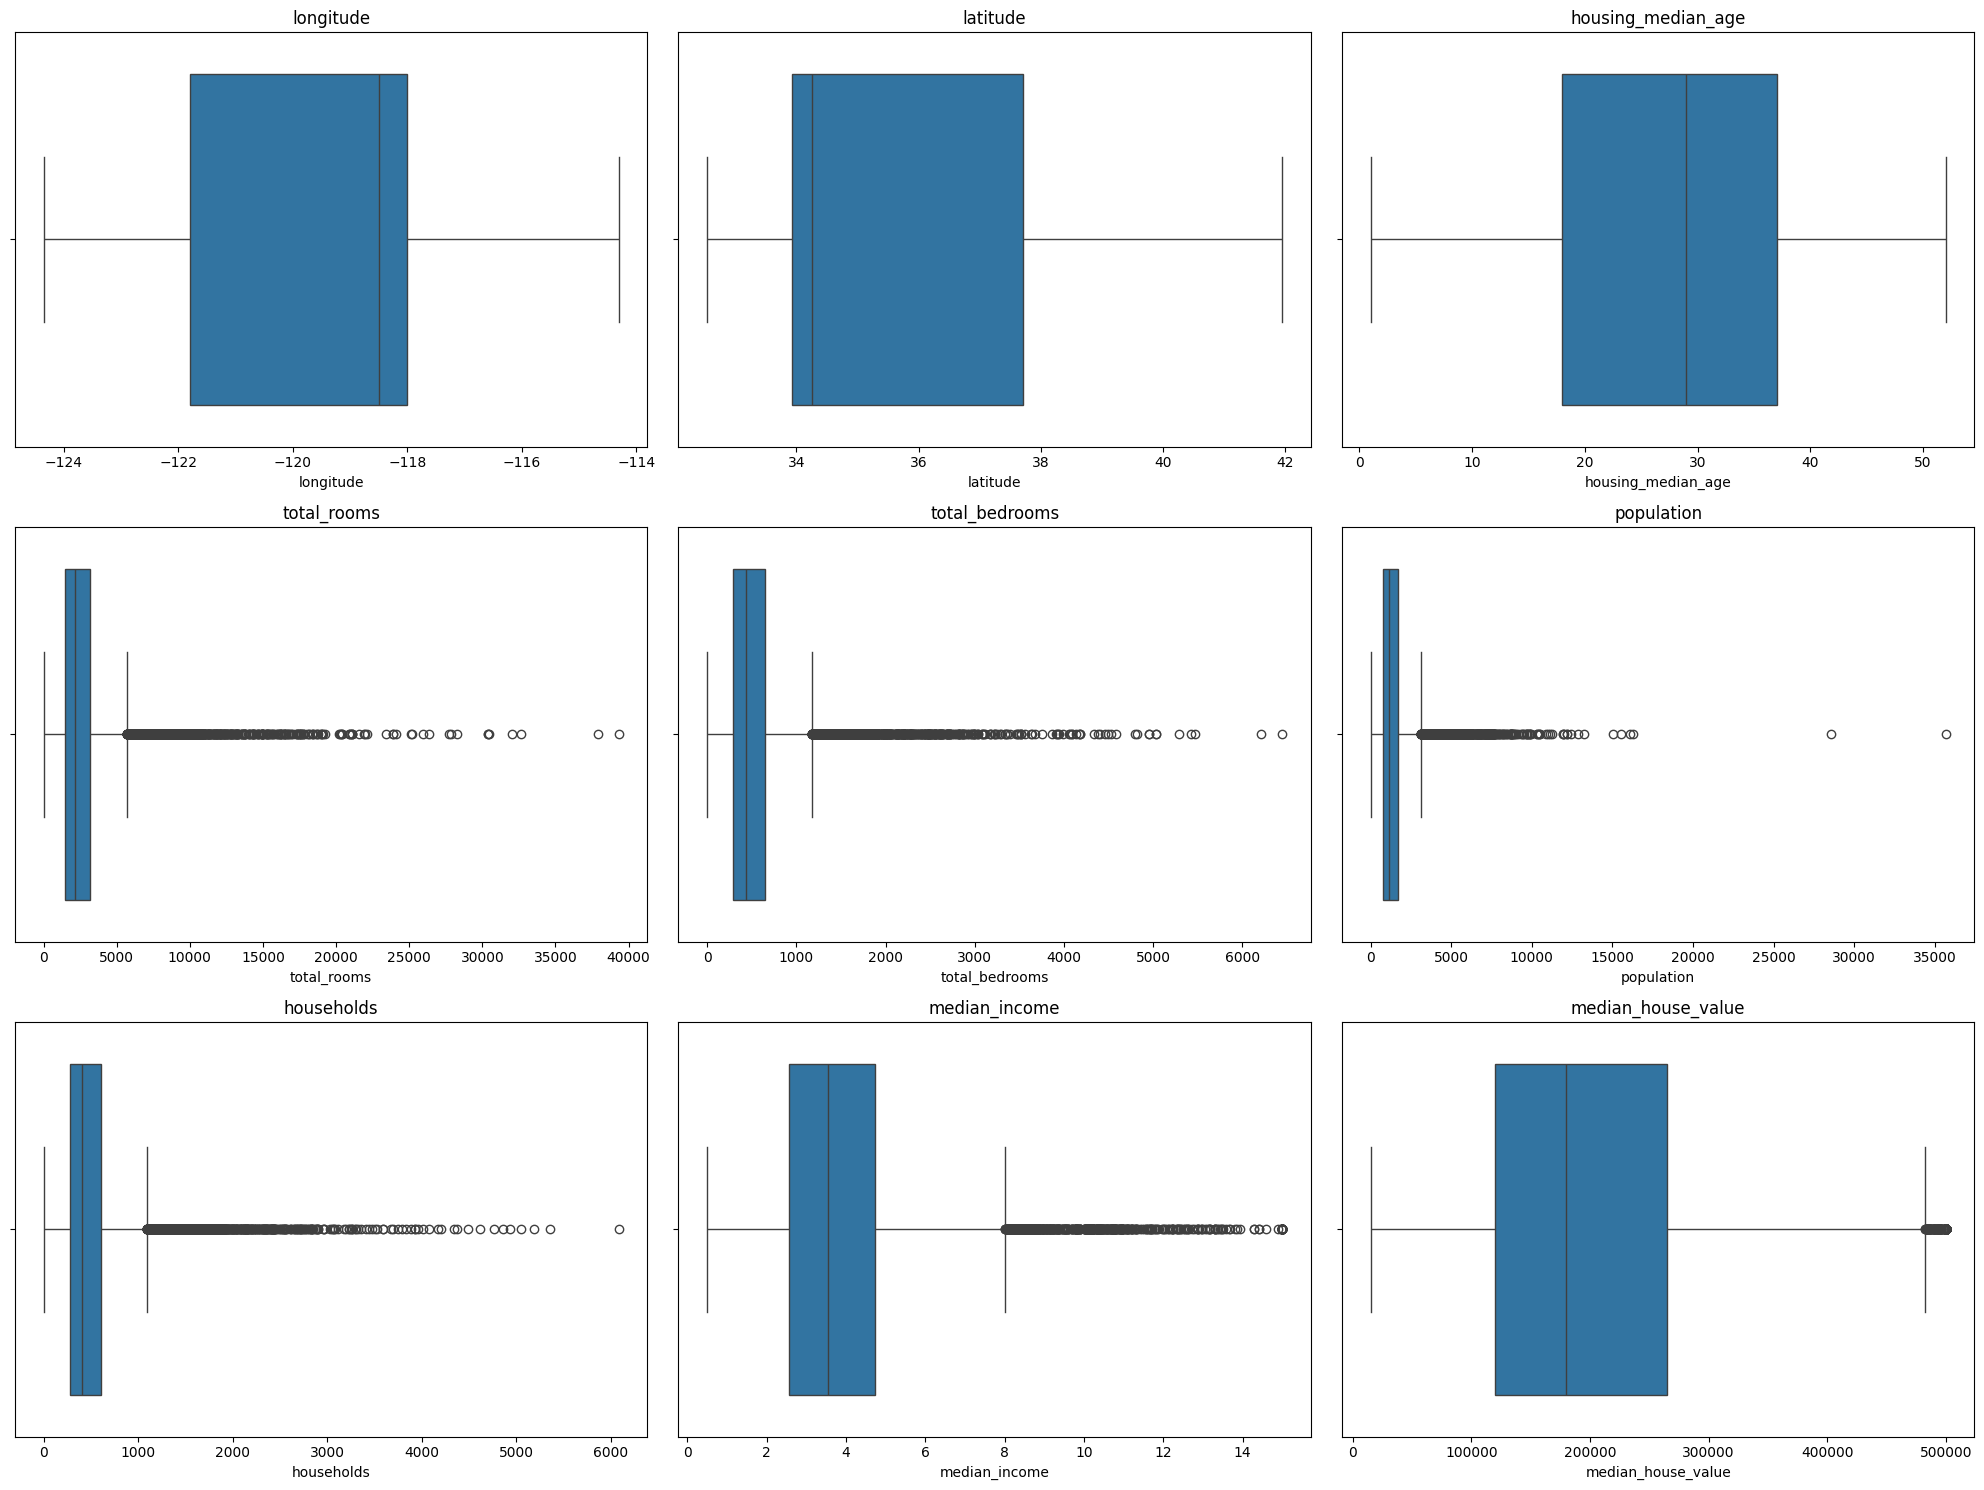

In [ ]:
#Box Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=numerical_cols[col], palette = 'viridis') # Removed hue parameter
    plt.xlabel(col) # Added x-label as the column name
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Analysis based on the Heatmap:

The heatmap shows the correlation coefficients between all pairs of numerical features. Then,


* **Median_income has the strongest positive correlation with median_house_value (around 0.69)** - a significant positive relationship.This suggests that ***areas with higher median incomes tend to have higher median house values***.

  Total_rooms, housing_median_age, population, total_bedrooms and households show negligible to moderate positive correlations with median_house_value. Latitude and Longitude show weak negative correlations, which is expected in California data where certain geographical areas (coastal, southern) tend to have different price levels.


* **There are strong positive correlations between total_rooms,total_bedrooms, population, and households (all above 0.85).**

  This is expected as these features are related to the size and occupancy of houses/blocks.



*   **Latitude and Longitude have a strong negative correlation (around -0.92)**, which is geographic and expected as longitude decreases from west to east as latitude increases from south to north in the state.

  

# Analysis based on the Box Plots:

**Outliers:** The box plots clearly show the presence of outliers -  the individual points beyond the whiskers - in several numerical features.

total_rooms, total_bedrooms, population, and households have a significant number of high-value outliers, indicating some areas or blocks have exceptionally large numbers in these categories compared to the majority.

median_income and median_house_value also show some outliers, particularly on the higher end. housing_median_age, longitude, and latitude appear to have fewer or less extreme outliers based on the box plot visualization.

**Possible causes for outliers in features like room numbers, population, or house values could include specific properties being much larger than average, multi-unit dwellings in certain areas, or exceptionally high-value properties in desirable locations.**



/tmp/ipython-input-2249063938.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.loc[df_premium.index, 'ocean_proximity'], y='median_house_value', data=df_premium, palette='viridis', ax=axes[0])
/tmp/ipython-input-2249063938.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cost_per_room', data=df_premium, palette='viridis', ax=axes[1])
/tmp/ipython-input-2249063938.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_income', data=df_premium, palette='viridis', ax=axes[2]) # Use integer bins for x-axis


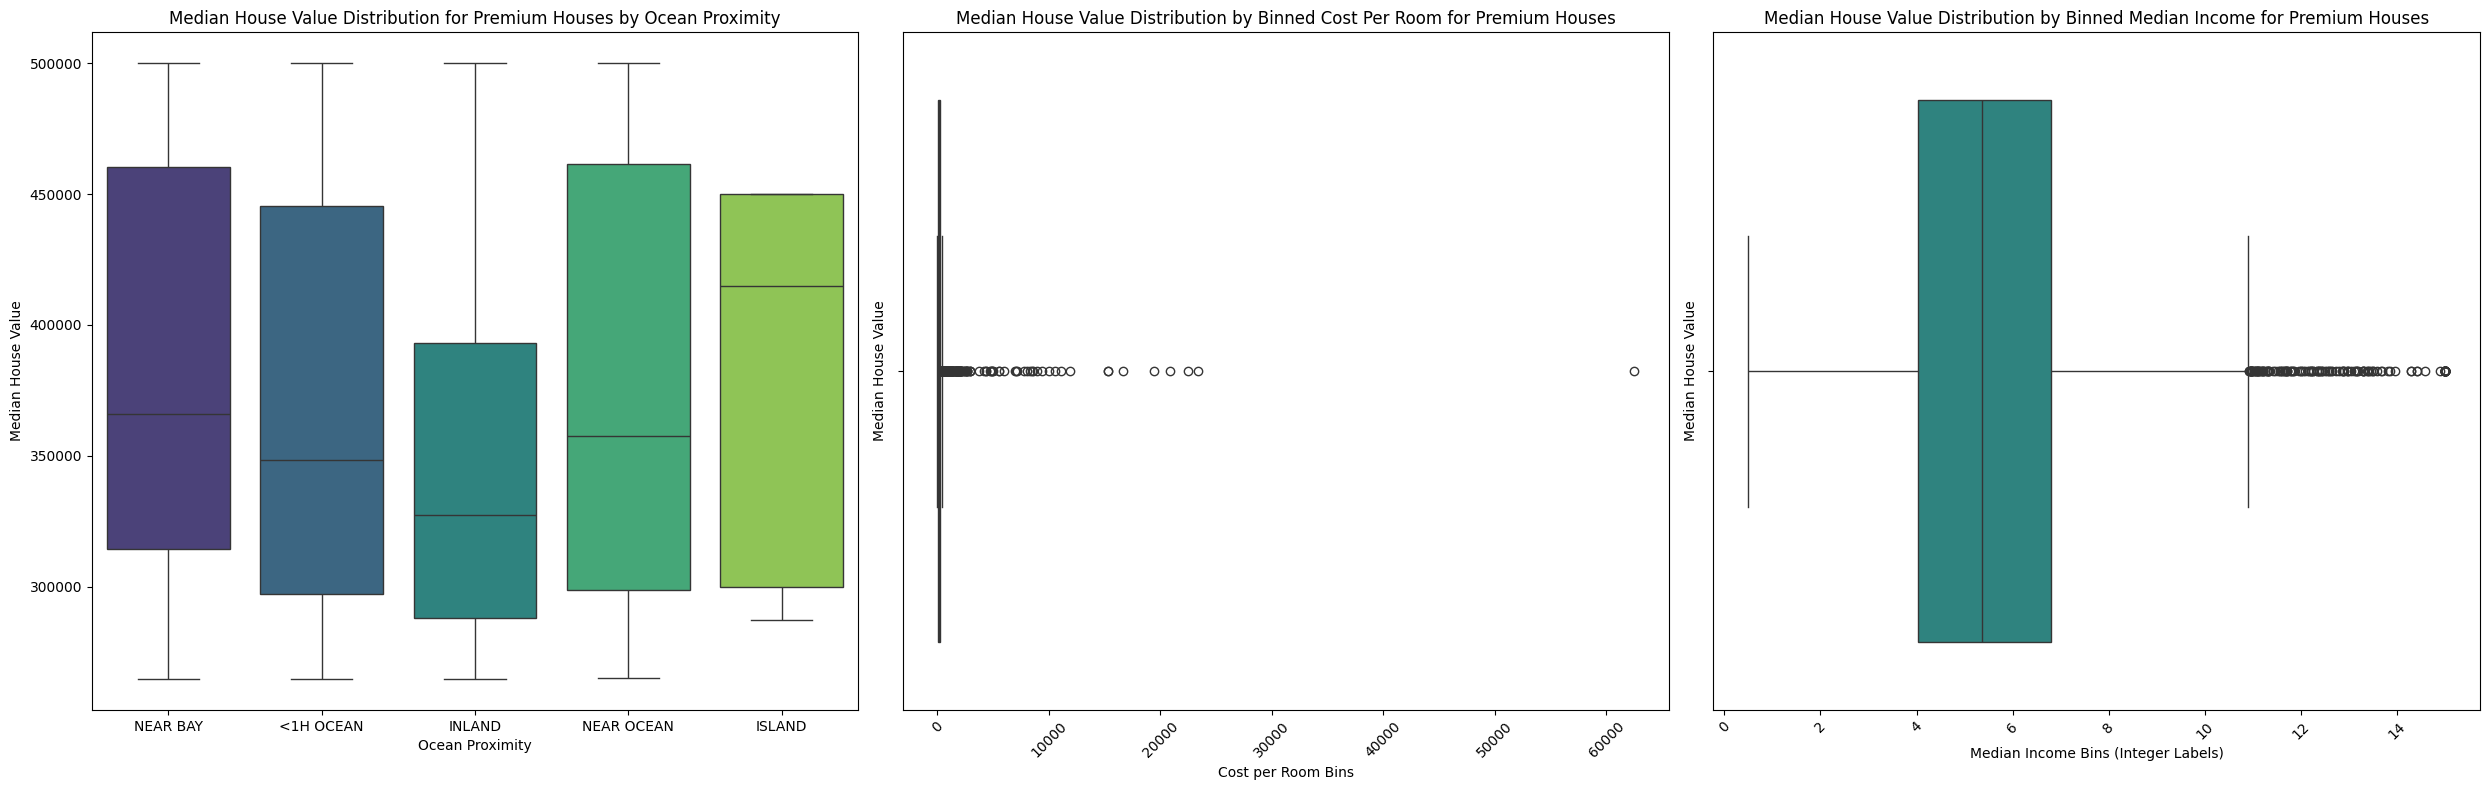

In [ ]:
df['cost_per_room'] = df['median_house_value'] / df['total_rooms']
premium_threshold = df['median_house_value'].quantile(0.75)
df_premium = df[df['median_house_value'] >= premium_threshold].copy() # Use .copy() to avoid SettingWithCopyWarning

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# First subplot: Median House Value Distribution for Premium Houses by Ocean Proximity
# Use the original categorical 'ocean_proximity' column from the 'data' DataFrame
sns.boxplot(x=data.loc[df_premium.index, 'ocean_proximity'], y='median_house_value', data=df_premium, palette='viridis', ax=axes[0])
axes[0].set_title('Median House Value Distribution for Premium Houses by Ocean Proximity')
axes[0].set_xlabel('Ocean Proximity')
axes[0].set_ylabel('Median House Value')

'''
# Create bins for 'cost_per_room' and get the bin edges
df_premium['cost_per_room_binned'], bin_edges = pd.qcut(df_premium['cost_per_room'], q=10, labels=False, duplicates='drop', retbins=True)

# Create bin labels
bin_labels = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(len(bin_edges)-1)]

# Map the bin numbers to the created labels
df_premium['cost_per_room_labeled'] = df_premium['cost_per_room_binned'].map(dict(enumerate(bin_labels)))

 Convert the labeled bins to a Categorical type with ordered categories
from pandas.api.types import CategoricalDtype
bin_order = sorted(bin_labels, key=lambda x: float(x.split('-')[0])) # Sort labels based on the start of the range
categorical_bin_type = CategoricalDtype(categories=bin_order, ordered=True)
df_premium['cost_per_room_labeled'] = df_premium['cost_per_room_labeled'].astype(categorical_bin_type)'''


# Second subplot: Median House Value Distribution by Cost Per Room for Premium Houses
sns.boxplot(x='cost_per_room', data=df_premium, palette='viridis', ax=axes[1])
axes[1].set_title('Median House Value Distribution by Cost Per Room for Premium Houses')
axes[1].set_xlabel('Cost per Room Bins')
axes[1].set_ylabel('Median House Value')
axes[1].tick_params(axis='x', rotation=45) # Removed ha='right'


# Third subplot: Median House Value Distribution by Median Income for Premium Houses


sns.boxplot(x='median_income', data=df_premium, palette='viridis', ax=axes[2]) # Use integer bins for x-axis
axes[2].set_title('Median House Value Distribution by Median Income for Premium Houses')
axes[2].set_xlabel('Median Income Bins (Integer Labels)') # Updated label
axes[2].set_ylabel('Median House Value')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

1. Median House Value Distribution for Premium Houses by Ocean Proximity:

This plot shows how the median house value is distributed among premium houses across different ocean proximity categories.

The "ISLAND" and "NEAR OCEAN" categories appear to have the highest median house values even within the premium segment, suggesting that proximity to the ocean is a strong factor for high-value properties.
"NEAR BAY" and "OCEAN" also have relatively high median values, while "INLAND" generally has lower median values for premium houses, although there can still be outliers with high values.


2. Median House Value Distribution by Binned Cost Per Room for Premium
Houses:

This plot shows the distribution of median house value for premium houses across different ranges (bins) of cost per room.

There is a clear trend: as the cost per room increases (moving from left to right across the bins), the median house value also tends to increase significantly. The higher bins show higher median house values and potentially a wider spread, indicating that properties with a higher cost per room are generally more valuable, even within the premium category.

3. Median House Value Distribution by Binned Median Income for Premium Houses:

This plot shows the distribution of median house value for premium houses across different integer bins of median income.

As median income increases (higher bin numbers), the median house value also tends to be higher indicating a strong positive relationship between median income and median house value. This suggests that higher-income areas tend to have more expensive premium houses.

/tmp/ipython-input-4197244564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], ax=axes[1], palette='viridis')


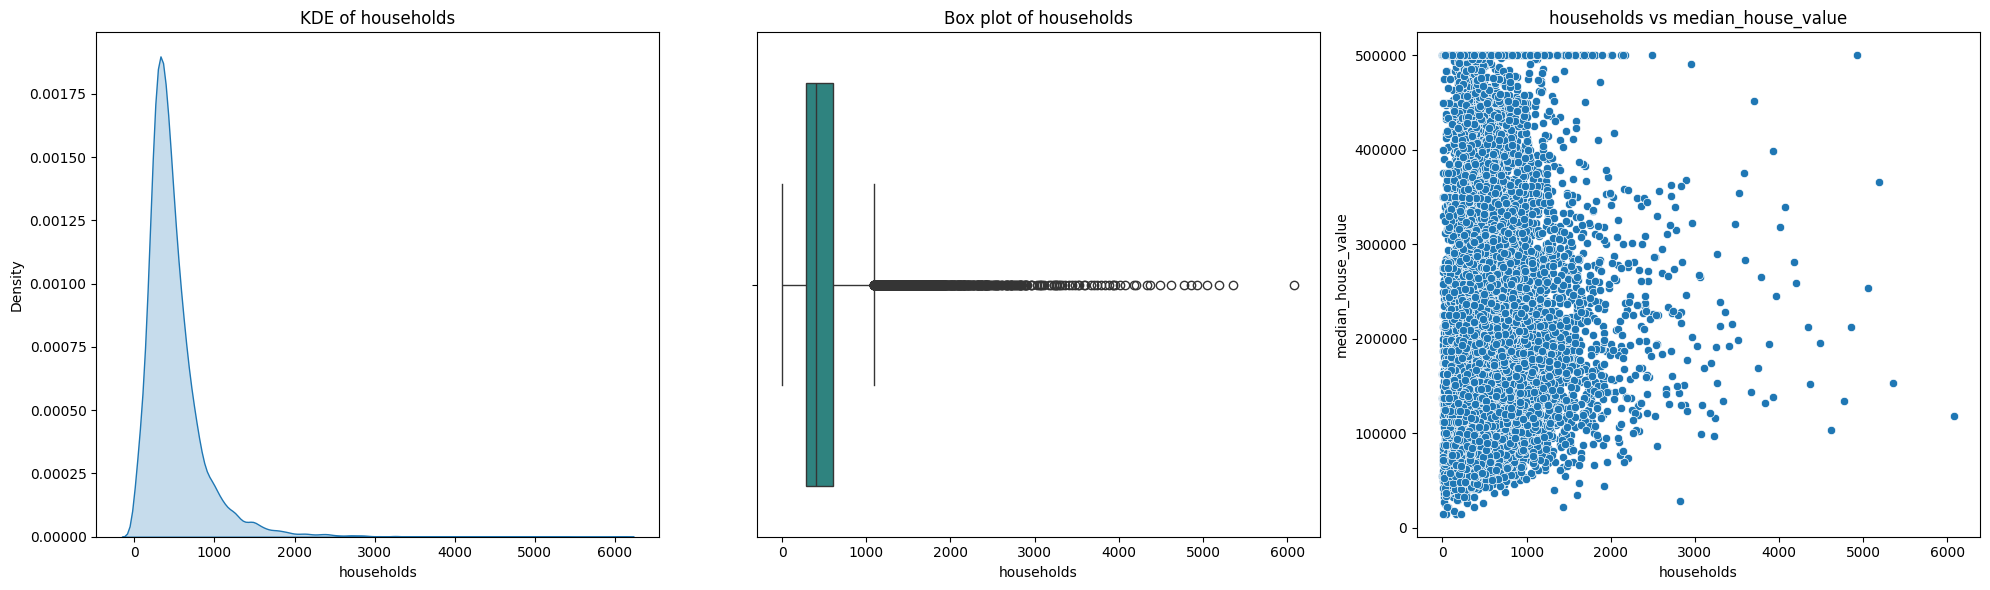

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_numerical_column(df, column_name, target_column='median_house_value'):
    """
    Visualizes the distribution and relationship of a specified numerical column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the numerical column to visualize.
        target_column (str, optional): The name of the target column for the scatter plot.
                                       Defaults to 'median_house_value'.
    """
    if column_name not in df.select_dtypes(include=np.number).columns:
        print(f"Error: '{column_name}' is not a numerical column in the DataFrame.")
        return

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Subplot 1: KDE plot
    sns.kdeplot(x=df[column_name], ax=axes[0], fill=True)
    axes[0].set_title(f'KDE of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')

    # Subplot 2: Box plot
    sns.boxplot(x=df[column_name], ax=axes[1], palette='viridis')
    axes[1].set_title(f'Box plot of {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('') # Y-label might not be necessary for a single box plot

    # Subplot 3: Scatter plot against target_column
    sns.scatterplot(x=df[column_name], y=df[target_column], ax=axes[2])
    axes[2].set_title(f'{column_name} vs {target_column}')
    axes[2].set_xlabel(column_name)
    axes[2].set_ylabel(target_column)

    plt.tight_layout()
    plt.show()

visualize_numerical_column(df, 'households')

# Example usage (you can call this function with different column names)
# visualize_numerical_column(df, 'total_rooms')
# visualize_numerical_column(df, 'median_income')

/tmp/ipython-input-487312354.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='house_value_quartile', y=column_name, data=df, ax=axes[1], palette='viridis', alpha=0.5, jitter=0.2)


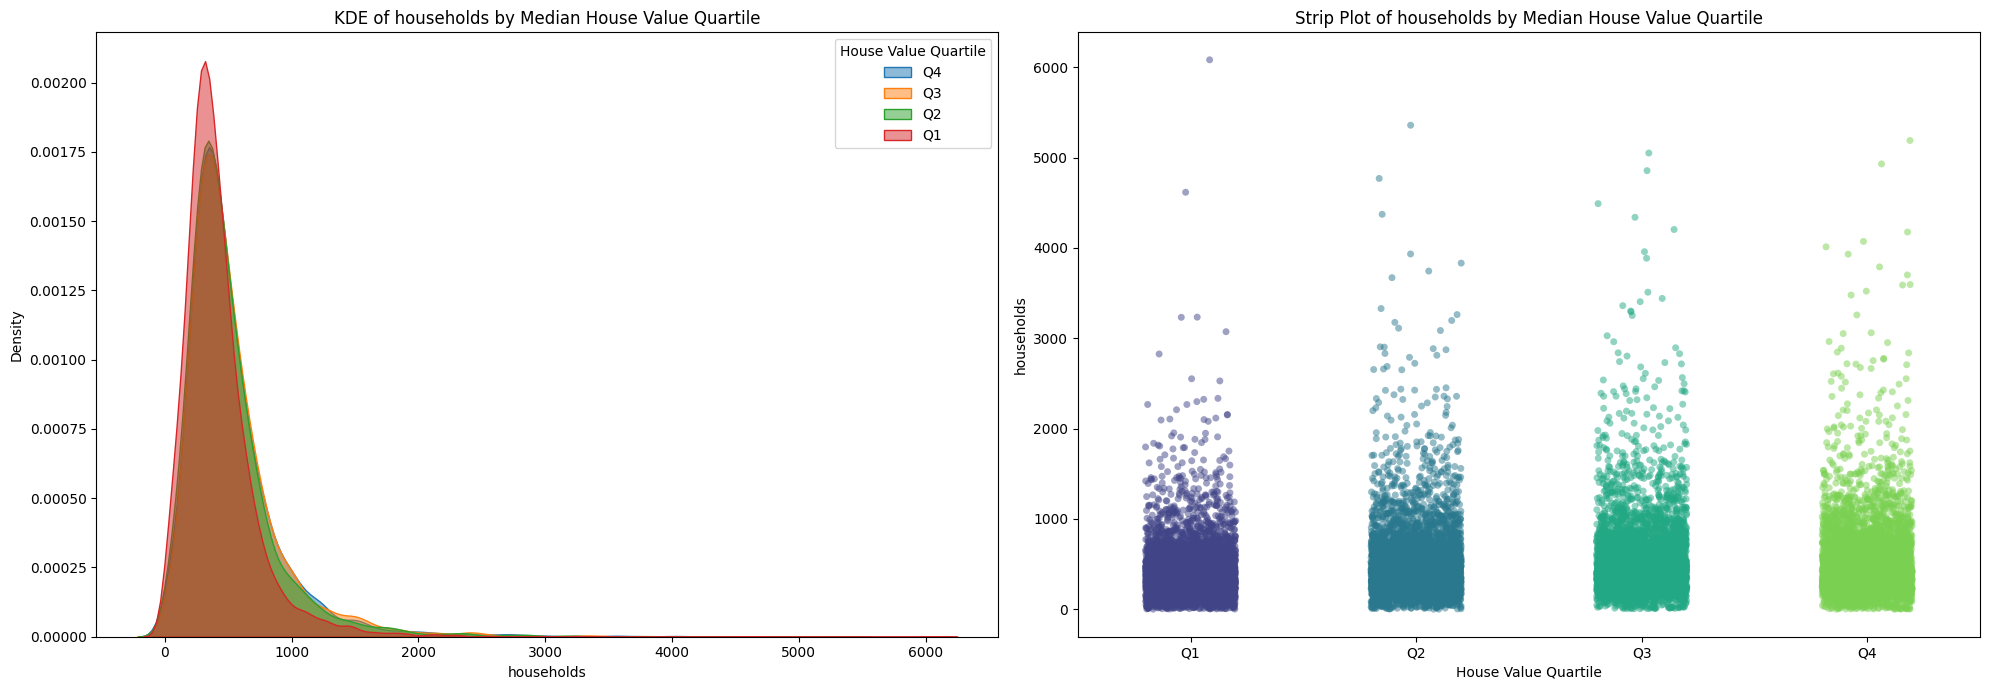

In [ ]:
def analyze_by_house_value_quartiles(df, column_name):
    """
    Analyzes a numerical column's distribution based on median_house_value quartiles.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the numerical column to analyze.
    """
    if column_name not in df.select_dtypes(include=np.number).columns:
        print(f"Error: '{column_name}' is not a numerical column in the DataFrame.")
        return

    # Divide median_house_value into quartiles
    df['house_value_quartile'] = pd.qcut(df['median_house_value'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Subplot 1: Overlapping KDE plots for each quartile
    for quartile in df['house_value_quartile'].unique():
        sns.kdeplot(x=df[df['house_value_quartile'] == quartile][column_name], ax=axes[0], label=quartile, fill=True, alpha=0.5)
    axes[0].set_title(f'KDE of {column_name} by Median House Value Quartile')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')
    axes[0].legend(title='House Value Quartile')

    # Subplot 2: Strip plot grouped by quartiles
    sns.stripplot(x='house_value_quartile', y=column_name, data=df, ax=axes[1], palette='viridis', alpha=0.5, jitter=0.2)
    axes[1].set_title(f'Strip Plot of {column_name} by Median House Value Quartile')
    axes[1].set_xlabel('House Value Quartile')
    axes[1].set_ylabel(column_name)

    plt.tight_layout()
    plt.show()

    # Drop the temporary quartile column
    df.drop('house_value_quartile', axis=1, inplace=True)

analyze_by_house_value_quartiles(df, 'households')
# Example usage:
# analyze_by_house_value_quartiles(df, 'total_rooms')
# analyze_by_house_value_quartiles(df, 'median_income')

Analyzing outliers for column: 'median_house_value'
Mean: 206855.82
Standard Deviation: 115395.62
Lower Bound (Mean - 2*StdDev): -23935.41
Upper Bound (Mean + 2*StdDev): 437647.05
Number of outliers: 1383


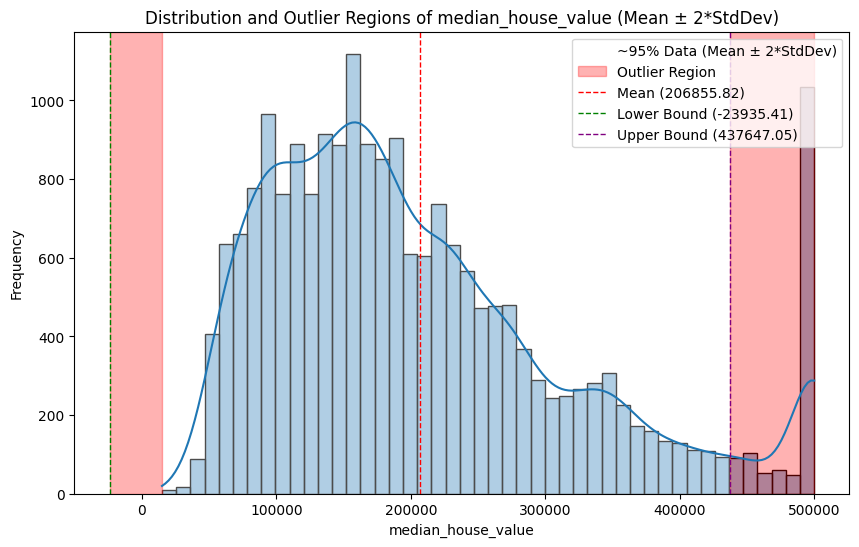

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def identify_and_visualize_outliers_std(df, column_name):
    """
    Identifies and visualizes outliers in a numerical column based on standard deviation.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the numerical column to analyze.
    """
    if column_name not in df.select_dtypes(include=np.number).columns:
        print(f"Error: '{column_name}' is not a numerical column in the DataFrame.")
        return

    mean = df[column_name].mean()
    std_dev = df[column_name].std()

    # Calculate bounds for approximately 95% of data (mean +/- 2*std_dev)
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the number of outliers
    num_outliers = len(outliers)

    print(f"Analyzing outliers for column: '{column_name}'")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Lower Bound (Mean - 2*StdDev): {lower_bound:.2f}")
    print(f"Upper Bound (Mean + 2*StdDev): {upper_bound:.2f}")
    print(f"Number of outliers: {num_outliers}")

    # Visualize the data distribution and highlight outlier regions
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    sns.histplot(df[column_name], kde=True, ax=ax)

    # Highlight the non-outlier region
    ax.axvspan(lower_bound, upper_bound, color='white', alpha=0.3, label='~95% Data (Mean ± 2*StdDev)')

    # Highlight the outlier regions
    ax.axvspan(df[column_name].min(), lower_bound, color='red', alpha=0.3, label='Outlier Region')
    ax.axvspan(upper_bound, df[column_name].max(), color='red', alpha=0.3)


    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean:.2f})')
    plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label=f'Lower Bound ({lower_bound:.2f})')
    plt.axvline(upper_bound, color='purple', linestyle='dashed', linewidth=1, label=f'Upper Bound ({upper_bound:.2f})')


    plt.title(f'Distribution and Outlier Regions of {column_name} (Mean ± 2*StdDev)')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


identify_and_visualize_outliers_std(df, 'median_house_value')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Keeping target value = Median House Value, we do not scale it for prediction
if 'median_house_value' in numerical_cols:
    numerical_cols.remove('median_house_value')


# No binning and label columns should remain for robustScaler technique
binning_cols = ['house_value_quartile', 'cost_per_room_binned', 'cost_per_room_labeled', 'median_income_binned', 'median_income_labeled']
numerical_cols = [col for col in numerical_cols if col not in binning_cols]


df_numerical = df[numerical_cols]

# Applying StandardScaler
scaler_standard = StandardScaler()
df_scaled_standard = scaler_standard.fit_transform(df_numerical)
df_scaled_standard = pd.DataFrame(df_scaled_standard, columns=numerical_cols)

print("Scaled Data (StandardScaler) - First 5 rows:")
display(df_scaled_standard.head())
print("\nDescription of Scaled Data (StandardScaler):")
display(df_scaled_standard.describe())
print("\nStandardScaler Range (Min, Max):")
display(df_scaled_standard.agg(['min', 'max']))


# Applying MinMaxScaler
scaler_minmax = MinMaxScaler()
df_scaled_minmax = scaler_minmax.fit_transform(df_numerical)
df_scaled_minmax = pd.DataFrame(df_scaled_minmax, columns=numerical_cols)

print("\nScaled Data (MinMaxScaler) - First 5 rows:")
display(df_scaled_minmax.head())
print("\nDescription of Scaled Data (MinMaxScaler):")
display(df_scaled_minmax.describe())
print("\nMinMaxScaler Range (Min, Max):")
display(df_scaled_minmax.agg(['min', 'max']))


# Applying RobustScaler
scaler_robust = RobustScaler()
df_scaled_robust = scaler_robust.fit_transform(df_numerical)
df_scaled_robust = pd.DataFrame(df_scaled_robust, columns=numerical_cols)

print("\nScaled Data (RobustScaler) - First 5 rows:")
display(df_scaled_robust.head())
print("\nDescription of Scaled Data (RobustScaler):")
display(df_scaled_robust.describe())
print("\nRobustScaler Range (Min, Max):")
display(df_scaled_robust.agg(['min', 'max']))

Scaled Data (StandardScaler) - First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,0.429314
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,-0.125353
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,0.101281
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,0.134625
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,0.065778



Description of Scaled Data (StandardScaler):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-8.526513e-15,-1.079584e-15,5.508083e-18,3.201573e-17,1.927829e-16,-1.101617e-17,6.885104e-17,6.609700e-17,-5.508083e-18,8.950635e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.280530e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-8.206532e-01,-1.838367e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.745184e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-8.206532e-01,-1.259839e-01
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.382088e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-1.167392e-01,-8.461967e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.513484e-01,2.644949e-01,2.758427e-01,4.593063e-01,-1.167392e-01,-1.824931e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.408954e+01,3.025033e+01,1.460152e+01,5.858286e+00,1.995003e+00,8.203048e+01



StandardScaler Range (Min, Max):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
min,-2.385992,-1.447568,-2.196180,-1.207283,-1.280530,-1.256123,-1.303984,-1.774299,-0.820653,-0.183837
max,2.625280,2.958068,1.856182,16.815580,14.089538,30.250330,14.601520,5.858286,1.995003,82.030476



Scaled Data (MinMaxScaler) - First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75,0.007458
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75,0.000711
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75,0.003468
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,0.003874
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75,0.003036



Description of Scaled Data (MinMaxScaler):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083313,0.039869,0.081983,0.232464,0.291461,0.002236
std,0.199555,0.226988,0.246776,0.055486,0.065063,0.031740,0.062873,0.131020,0.355166,0.012164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.000000,0.000704
50%,0.583665,0.182784,0.549020,0.054046,0.067815,0.032596,0.067094,0.209301,0.250000,0.001207
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.250000,0.002014
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



MinMaxScaler Range (Min, Max):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Scaled Data (RobustScaler) - First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
0,-0.986807,0.957672,0.631579,-0.733422,-0.892419,-0.899787,-0.870769,2.197582,2.0,4.770371
1,-0.984169,0.952381,-0.421053,2.924276,1.929242,1.316631,2.243077,2.186664,2.0,-0.378090
2,-0.989446,0.949735,1.210526,-0.388178,-0.716245,-0.714286,-0.713846,1.707732,2.0,1.725543
3,-0.992084,0.949735,1.210526,-0.501691,-0.586282,-0.648188,-0.584615,0.967177,2.0,2.035047
4,-0.992084,0.949735,1.210526,-0.294074,-0.456318,-0.640725,-0.461538,0.142854,2.0,1.396003



Description of Scaled Data (RobustScaler):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,2.064000e+04
mean,-0.284882,0.362926,-0.018974,0.299228,0.288435,0.276628,0.278584,1.540799e-01,0.165843,7.854459e-01
std,0.528636,0.565067,0.662398,1.283114,1.210878,1.207316,1.176399,8.715378e-01,1.420662,9.282296e+00
min,-1.546174,-0.455026,-1.473684,-1.249816,-1.262094,-1.239872,-1.255385,-1.392252e+00,-1.000000,-9.209395e-01
25%,-0.873351,-0.087302,-0.578947,-0.399500,-0.407220,-0.404051,-0.396923,-4.456270e-01,-1.000000,-3.839455e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018608e-16,0.000000,7.887571e-17
75%,0.126649,0.912698,0.421053,0.600500,0.592780,0.595949,0.603077,5.543730e-01,0.000000,6.160545e-01
max,1.102902,2.034392,1.210526,21.875018,17.348736,36.797441,17.455385,5.259674e+00,3.000000,7.621982e+02



RobustScaler Range (Min, Max):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,cost_per_room
min,-1.546174,-0.455026,-1.473684,-1.249816,-1.262094,-1.239872,-1.255385,-1.392252,-1.0,-0.920940
max,1.102902,2.034392,1.210526,21.875018,17.348736,36.797441,17.455385,5.259674,3.0,762.198189


# StandardScaler:

Scales features to have a mean of 0 and a standard deviation of 1.
The range of the scaled data is not fixed and can be arbitrarily large or small, depending on the original data's distribution and outliers. As you can see in the output, the min and max values vary significantly across columns.

**Benefits:** Useful when the data is approximately normally distributed or when algorithms assume zero mean and unit variance (e.g., Linear Regression, Logistic Regression, SVMs, PCA). It's less affected by outliers than MinMaxScaler in terms of compressing the majority of data points, but outliers will still have large scaled values.

**Drawbacks:** The scaled features do not have a fixed range, which can be an issue for algorithms sensitive to the scale of input features (e.g., neural networks with activation functions that are sensitive to large inputs).

# MinMaxScaler:
Scales features to a fixed range, typically between 0 and 1 (although you can specify other ranges).
The range of the scaled data is fixed between the specified minimum and maximum values (0 and 1 in this case).

**Benefits:** Ensures all features have the same scale, which is beneficial for algorithms that are not scale-invariant (e.g., K-Nearest Neighbors, Support Vector Machines with RBF kernel, Neural Networks). It preserves the relative relationships between data points within each feature.

**Drawbacks:** Highly sensitive to outliers. If there are significant outliers in the original data, the majority of the data will be compressed into a very small range in the scaled data, reducing the effectiveness of the scaling.

------------------------------------------------------------------

StandardScaler might be more appropriate if you plan to use algorithms that assume normality or are sensitive to the mean and standard deviation. *However, the outliers will still result in large scaled values.* MinMaxScaler will scale the data to a fixed range, but *the presence of outliers will likely compress the majority of your data points into a small part of the [0, 1] range for the affected features.*

**As there is a significant proportion of outliers to each numerical feature in our dataset, one should aim towards rectifying the deviations in the scaling caused by these outliers for the affected features. One could use RobustScaler, QuantileTransformer amongst other scaling methods.**

Given the presence of outliers and skewed distributions, the other scaling methods that are more robust to outliers are:


# RobustScaler:
This scaler removes the median and scales the data according to the interquartile range (IQR). It is less affected by outliers than StandardScaler and MinMaxScaler because it uses the median and IQR, which are less sensitive to extreme values than the mean and standard deviation. This could be beneficial for features with significant outliers like total_rooms, total_bedrooms, population, and households.

# QuantileTransformer (with output_distribution='normal' or 'uniform'):
This transformer scales features using quantile information.
With output_distribution='normal', it maps the data to a standard normal distribution.
With output_distribution='uniform', it maps the data to a uniform distribution between 0 and 1. This method is robust to outliers and can also handle non-linear relationships between features by transforming them based on their ranks. It can be particularly useful for heavily skewed data.

# PowerTransformer (e.g., Yeo-Johnson or Box-Cox):
This transformer applies a power transform to make the data more Gaussian-like.
Box-Cox requires the input data to be positive.
Yeo-Johnson supports both positive and negative data. These transformers can help in stabilizing variance and making the data more suitable for models that assume normality. They can be helpful for features with skewed distributions.

In [ ]:
# 11 (j). Feature Engineering

# Creating 'rooms_per_household': the average number of rooms per household
# This feature can indicate the size of houses in an area
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Creating 'population_per_household': the average number of people per household
# This feature can indicate household size or population density at the household level
df['population_per_household'] = df['population'] / df['households']

#Creating 'price_to_income' : Affordability
#This feature can indicate the affordability of high end homes
df["price_to_income"] = df["median_house_value"]/(df["median_income"]*1000)

# Display the first few rows to show the new features
print("DataFrame with new engineered features:")
display(df.head())


DataFrame with new engineered features:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_room,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3,514.318182,6.984127,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3,50.500070,6.238137,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3,240.013633,8.288136,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3,267.896389,5.817352,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3,210.325753,6.281853,2.181467
